In [1]:
# Import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn


In [2]:
# Read in the bank.csv file

bank = pd.read_csv("bank.csv")

# Display the first 5 rows

print(bank.head())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [3]:
# Explorating the data

bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
# Checking the stats distribution for numeric variables

bank[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].describe()


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
# Performing the binning for variable "age"

bank_new = bank

bin_labels = ['1. Young', '2. Adult', '3. Middle-aged', '4. Old']

bank_new['agebin'] = pd.qcut(bank_new['age'], q = 4, labels=bin_labels)

# Performing binning for variable "balance"

bin_labels = ['1. Bad', '2. Low', '3. Average', '4. Good']

bank_new['balancebin'] = pd.qcut(bank_new['balance'], q = 4, labels=bin_labels)

bank_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,agebin,balancebin
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1. Young,4. Good
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,1. Young,4. Good
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,2. Adult,3. Average
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1. Young,3. Average
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,4. Old,1. Bad


In [6]:
# Data Preparation
# 

from sklearn import preprocessing

# Display the column names

bank.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'agebin', 'balancebin'],
      dtype='object')

In [7]:
# Encoding of categorical variables

encoder = preprocessing.LabelEncoder()
bank2 = bank.apply(encoder.fit_transform)
bank2.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,agebin,balancebin
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0,0,3
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0,0,3
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0,1,2
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0,0,2
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0,3,0


In [8]:
# A) Exploratory work using Naive Bayes Multinomial Model

# A1) Multinomial Mode - Only dealing with 6 categorical variables
# Declaring predictor and target variables

pred = bank2[["job", "marital", "education", "default", "housing", "loan"]]
label = bank2["y"]

print(pred.head())
print(label.head())

   job  marital  education  default  housing  loan
0   10        1          0        0        0     0
1    7        1          1        0        1     1
2    4        2          2        0        1     0
3    4        1          2        0        1     1
4    1        1          1        0        1     0
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32


In [9]:
# Import MultinomialNB model from Scikit-Learn

from sklearn.naive_bayes import MultinomialNB

# Instantiate the model

nb = MultinomialNB()

# Partition the dataset into training and test tests
# Import packages for train test split

from sklearn.model_selection import train_test_split

# Split the data into training and testing

x_train, x_test, y_train, y_test = train_test_split(pred, label, test_size=0.2, random_state = 0)

# Fitting the LR model

nb.fit(x_train, y_train)
print("Training of Naive Bayes Multinominal model with 6 categorical variables is completed.")

# Predict using the fitted Naive Bayes model

y_pred = nb.predict(x_test)
print("Predicting labels using Naive Bayes Multinominal model with 6 categorical variables is completed.")


Training of Naive Bayes Multinominal model with 6 categorical variables is completed.
Predicting labels using Naive Bayes Multinominal model with 6 categorical variables is completed.


In [10]:
# summarize the fit of the model

from sklearn import metrics

test_acc = metrics.accuracy_score(y_test, y_pred)
print("Test accuracy using Naive Bayes Multinomial Model is :", str(test_acc), '\n')
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Comments - The confusion matrix reveals the case of Accuracy Paradox!


Test accuracy using Naive Bayes Multinomial Model is : 0.876243093922652 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       793
           1       0.00      0.00      0.00       112

    accuracy                           0.88       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.77      0.88      0.82       905

[[793   0]
 [112   0]]


C:\Users\TG\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Multinomial: ROC AUC=0.578


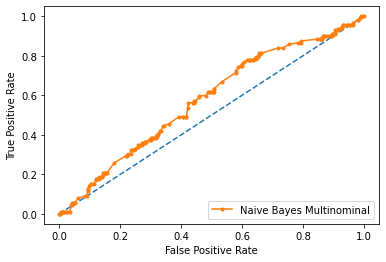

In [32]:
# ROC Calculation and ROC Curve
# Import packages for ROC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate reference prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Bayes Multinomial: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes Multinominal')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(loc = "lower right")
# show the plot
pyplot.show()

In [12]:
# A2) Multinomial Mode - All original categorical variables
# Declaring predictor variables

pred1 = bank2[["job", "marital", "education", "default", "housing", "loan", "contact", "month", "campaign", "previous", "poutcome"]]

print(pred1.head())


   job  marital  education  default  housing  loan  contact  month  campaign  \
0   10        1          0        0        0     0        0     10         0   
1    7        1          1        0        1     1        0      8         0   
2    4        2          2        0        1     0        0      0         0   
3    4        1          2        0        1     1        2      6         3   
4    1        1          1        0        1     0        2      8         0   

   previous  poutcome  
0         0         3  
1         4         0  
2         1         0  
3         0         3  
4         0         3  


In [13]:
# Instantiate the model

nb1 = MultinomialNB()

# Split the data into training and testing

x_train1, x_test1, y_train1, y_test1 = train_test_split(pred1, label, test_size=0.2, random_state = 0)

# Fitting the LR model

nb1.fit(x_train1, y_train1)
print("Training of Naive Bayes Multinominal model with all categorical variables is completed.")

# Predict using the fitted Naive Bayes model

y_pred1 = nb1.predict(x_test1)
print("Predicting labels using Naive Bayes Multinominal model with all original categorical variables is completed.")


Training of Naive Bayes Multinominal model with all categorical variables is completed.
Predicting labels using Naive Bayes Multinominal model with all original categorical variables is completed.


In [14]:
# summarize the fit of the model

test_acc1 = metrics.accuracy_score(y_test1, y_pred1)
print("Test accuracy using Naive Bayes Gaussian Model is :", str(test_acc1), '\n')
print(metrics.classification_report(y_test1, y_pred1))
print(metrics.confusion_matrix(y_test1, y_pred1))


Test accuracy using Naive Bayes Gaussian Model is : 0.8397790055248618 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       793
           1       0.26      0.16      0.20       112

    accuracy                           0.84       905
   macro avg       0.57      0.55      0.55       905
weighted avg       0.81      0.84      0.82       905

[[742  51]
 [ 94  18]]


Naive Bayes Multinomial: ROC AUC=0.643


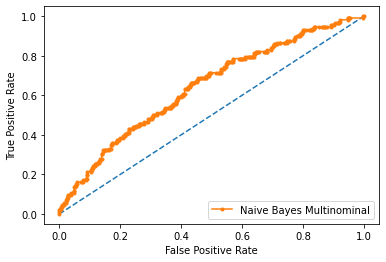

In [33]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = nb1.predict_proba(x_test1)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Bayes Multinomial: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes Multinominal')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(loc = "lower right")
# show the plot
pyplot.show()

In [16]:
# A3) Multinomial Mode - All original categorical variables plus 2 binned variables
# Declaring predictor variables

pred2 = bank2[["agebin", "job", "marital", "education", "default", "balancebin", "housing", "loan", "contact", "month", "campaign", "previous", "poutcome"]]

print(pred2.head())


   agebin  job  marital  education  default  balancebin  housing  loan  \
0       0   10        1          0        0           3        0     0   
1       0    7        1          1        0           3        1     1   
2       1    4        2          2        0           2        1     0   
3       0    4        1          2        0           2        1     1   
4       3    1        1          1        0           0        1     0   

   contact  month  campaign  previous  poutcome  
0        0     10         0         0         3  
1        0      8         0         4         0  
2        0      0         0         1         0  
3        2      6         3         0         3  
4        2      8         0         0         3  


In [17]:
# Instantiate the model

nb2 = MultinomialNB()

# Split the data into training and testing

x_train2, x_test2, y_train2, y_test2 = train_test_split(pred2, label, test_size=0.2, random_state = 0)

# Fitting the LR model

nb2.fit(x_train2, y_train2)
print("Training of Naive Bayes Multinominal model with 2 additional binned variables is completed.")

# Predict using the fitted Naive Bayes model

y_pred2 = nb2.predict(x_test2)
print("Predicting labels using Naive Bayes Multinominal model with 2 additional binned variables is completed.")


Training of Naive Bayes Multinominal model with 2 additional binned variables is completed.
Predicting labels using Naive Bayes Multinominal model with 2 additional binned variables is completed.


In [42]:
# summarize the fit of the model

test_acc2 = metrics.accuracy_score(y_test2, y_pred2)
print("Test accuracy using Naive Bayes Gaussian Model is :", str(test_acc2), '\n')
print(metrics.classification_report(y_test2, y_pred2))
print(metrics.confusion_matrix(y_test2, y_pred2))


Test accuracy using Naive Bayes Gaussian Model is : 0.8386740331491712 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       793
           1       0.26      0.16      0.20       112

    accuracy                           0.84       905
   macro avg       0.57      0.55      0.55       905
weighted avg       0.81      0.84      0.82       905

[[741  52]
 [ 94  18]]


Naive Bayes Multinomial: ROC AUC=0.656


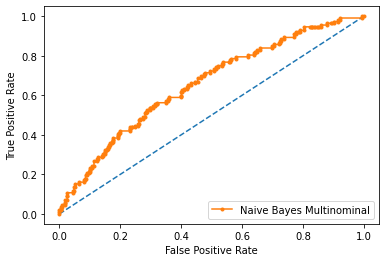

In [34]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = nb2.predict_proba(x_test2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Bayes Multinomial: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes Multinominal')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(loc = "lower right")
# show the plot
pyplot.show()

In [20]:
# B) Exploratory work using Naive Bayes Gaussian Model

# B1) Gaussuan Mode -  All variables
# Declaring predictor variables (excluding the 2 binned variables)

pred3 = bank2.drop(columns=["agebin", "balancebin", "y"])

print(pred3.head())


   age  job  marital  education  default  balance  housing  loan  contact  \
0   11   10        1          0        0     1475        0     0        0   
1   14    7        1          1        0     2030        1     1        0   
2   16    4        2          2        0     1303        1     0        0   
3   11    4        1          2        0     1352        1     1        2   
4   40    1        1          1        0      274        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  
0   18     10        75         0      0         0         3  
1   10      8       216         0    228         4         0  
2   15      0       181         0    219         1         0  
3    2      6       195         3      0         0         3  
4    4      8       222         0      0         0         3  


In [21]:
# Import GaussianNB model from Scikit-Learn

from sklearn.naive_bayes import GaussianNB

# Instantiate the model

nb3 = GaussianNB()

# Partition the dataset into training and test tests
# Split the data into training and testing

x_train3, x_test3, y_train3, y_test3 = train_test_split(pred3, label, test_size=0.2, random_state = 0)

# Fitting the LR model

nb3.fit(x_train3, y_train3)
print("Training of Naive Bayes Gaussian model with all variables is completed.")

# Predict using the fitted Naive Bayes Gaussian model

y_pred3 = nb3.predict(x_test3)
print("Predicting labels using Naive Bayes Gaussian model with all variables is completed.")


Training of Naive Bayes Gaussian model with all variables is completed.
Predicting labels using Naive Bayes Gaussian model with all variables is completed.


In [43]:
# summarize the fit of the model

test_acc3 = metrics.accuracy_score(y_test3, y_pred3)
print("Test accuracy using Naive Bayes Gaussian Model is :", str(test_acc3), '\n')


print(metrics.classification_report(y_test3, y_pred3))
print(metrics.confusion_matrix(y_test3, y_pred3))


Test accuracy using Naive Bayes Gaussian Model is : 0.8132596685082873 

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       793
           1       0.33      0.48      0.39       112

    accuracy                           0.81       905
   macro avg       0.62      0.67      0.64       905
weighted avg       0.85      0.81      0.83       905

[[682 111]
 [ 58  54]]


Naive Bayes Gaussian: ROC AUC=0.815


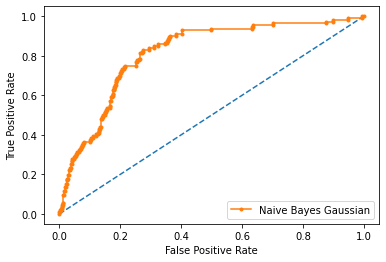

In [41]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = nb3.predict_proba(x_test3)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Bayes Gaussian: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes Gaussian')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(loc = "lower right")
# show the plot
pyplot.show()

In [24]:
# B2) A reduced model with one less predictor variable "day"
# Refining the model - dropping predictors variables "day"

# Declaring predictor variables

pred4 = pred3.drop(columns=["day"])

print(pred4.head())


   age  job  marital  education  default  balance  housing  loan  contact  \
0   11   10        1          0        0     1475        0     0        0   
1   14    7        1          1        0     2030        1     1        0   
2   16    4        2          2        0     1303        1     0        0   
3   11    4        1          2        0     1352        1     1        2   
4   40    1        1          1        0      274        1     0        2   

   month  duration  campaign  pdays  previous  poutcome  
0     10        75         0      0         0         3  
1      8       216         0    228         4         0  
2      0       181         0    219         1         0  
3      6       195         3      0         0         3  
4      8       222         0      0         0         3  


In [25]:
# Instantiate the model

nb4 = GaussianNB()

# Partition the dataset into training and test tests
# Split the data into training and testing

x_train4, x_test4, y_train4, y_test4 = train_test_split(pred4, label, test_size=0.2, random_state = 0)

# Fitting the LR model

nb4.fit(x_train4, y_train4)
print("Training of reduced Naive Bayes Gaussian model is completed.")

# Predict using the fitted Naive Bayes Gaussian model

y_pred4 = nb4.predict(x_test4)
print("Predicting labels using reduced Naive Bayes Gaussian model is completed.")


Training of reduced Naive Bayes Gaussian model is completed.
Predicting labels using reduced Naive Bayes Gaussian model is completed.


In [44]:
# summarize the fit of the model

test_acc4 = metrics.accuracy_score(y_test4, y_pred4)
print("Test accuracy using Naive Bayes Gaussian Model is :", str(test_acc4), '\n')
print(metrics.classification_report(y_test4, y_pred4))
print(metrics.confusion_matrix(y_test4, y_pred4))


Test accuracy using Naive Bayes Gaussian Model is : 0.8143646408839779 

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       793
           1       0.33      0.49      0.40       112

    accuracy                           0.81       905
   macro avg       0.63      0.68      0.64       905
weighted avg       0.85      0.81      0.83       905

[[682 111]
 [ 57  55]]


Naive Bayes Gaussian: ROC AUC=0.815


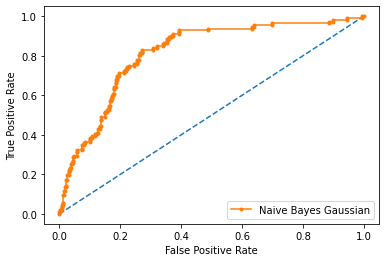

In [40]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = nb4.predict_proba(x_test4)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Bayes Gaussian: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes Gaussian')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(loc = "lower right")
# show the plot
pyplot.show()

In [28]:
# B3) A model with only numerical variables
# Refining the model - using predictors variables "age", "balance", "duration" and "pday"
# Declaring predictor variables

pred5 = bank2[["age", "balance", "duration", "pdays"]]

print(pred5.head())


   age  balance  duration  pdays
0   11     1475        75      0
1   14     2030       216    228
2   16     1303       181    219
3   11     1352       195      0
4   40      274       222      0


In [29]:
# Instantiate the model

nb5 = GaussianNB()

# Partition the dataset into training and test tests
# Split the data into training and testing

x_train5, x_test5, y_train5, y_test5 = train_test_split(pred5, label, test_size=0.2, random_state = 0)

# Fitting the LR model

nb5.fit(x_train5, y_train5)
print("Training of Naive Bayes Gaussian model with 4 numeric variables is completed.")

# Predict using the reduced Naive Bayes Gaussian model

y_pred5 = nb5.predict(x_test5)
print("Predicting labels using Naive Bayes Multinominal model with 4 numeric variables is completed.")


Training of Naive Bayes Gaussian model with 4 numeric variables is completed.
Predicting labels using Naive Bayes Multinominal model with 4 numeric variables is completed.


In [45]:
# summarize the fit of the model

test_acc5 = metrics.accuracy_score(y_test5, y_pred5)
print("Test accuracy using Naive Bayes Gaussian Model is :", str(test_acc5), '\n')
print(metrics.classification_report(y_test5, y_pred5))
print(metrics.confusion_matrix(y_test5, y_pred5))


Test accuracy using Naive Bayes Gaussian Model is : 0.8784530386740331 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       793
           1       0.51      0.44      0.47       112

    accuracy                           0.88       905
   macro avg       0.72      0.69      0.70       905
weighted avg       0.87      0.88      0.87       905

[[746  47]
 [ 63  49]]


Naive Bayes Gaussian: ROC AUC=0.827


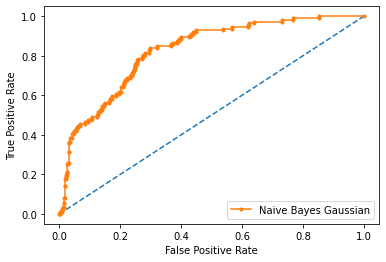

In [39]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = nb5.predict_proba(x_test5)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Bayes Gaussian: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes Gaussian')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(loc = "lower right")
# show the plot
pyplot.show()